In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import warnings 
warnings.simplefilter('ignore')

In [2]:
df=pd.read_excel('orders_data1.xlsx')
df.head(3)

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,407-5532335-4314768,2021-06-13,Pavithra,"POLLACHI,",TAMIL NADU,SKU: QV-PHXY-LGY8,Pure Leather Ganesh Piggy Bank | Money Bank fo...,1,₹175.00,NaN,NaN,Delivered to buyer
1,404-7918321-6528342,2021-06-16,narendra,"KODAD,",TELANGANA,SKU: 5B-NW9K-L3AO,Pure Leather Elephant Shaped Piggy Coin Bank |...,1,₹175.00,NaN,Cash On Delivery,Delivered to buyer
2,406-4504814-5756357,2021-06-16,Shamal,"BADLAPUR,",MAHARASHTRA,SKU: 3O-GBSM-TYZE,Pure Leather Ganesh Piggy Bank | Money Bank fo...,1,₹175.00,NaN,NaN,Delivered to buyer


In [3]:
df.shape

(171, 12)

In [4]:
df.head(1)

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,407-5532335-4314768,2021-06-13,Pavithra,"POLLACHI,",TAMIL NADU,SKU: QV-PHXY-LGY8,Pure Leather Ganesh Piggy Bank | Money Bank fo...,1,₹175.00,NaN,NaN,Delivered to buyer


In [5]:
def drop(df, *feature):
    for i in feature:
        df.drop(i,axis=1,inplace=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_no      171 non-null    object        
 1   order_date    171 non-null    datetime64[ns]
 2   buyer         171 non-null    object        
 3   ship_city     171 non-null    object        
 4   ship_state    171 non-null    object        
 5   sku           171 non-null    object        
 6   description   171 non-null    object        
 7   quantity      171 non-null    int64         
 8   item_total    153 non-null    object        
 9   shipping_fee  145 non-null    object        
 10  cod           47 non-null     object        
 11  order_status  171 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 16.2+ KB


In [7]:
# Convert city and state into uppercase
places = ['ship_city', 'ship_state']
for i in places:
    df[i] = df[i].apply(lambda x: x.upper())

In [8]:
# removing comma from city values
df['ship_city'] = df['ship_city'].apply(lambda x:x.replace(',',' '))
df['ship_state'] = df['ship_state'].apply(lambda x:x.replace(',',' '))

In [9]:
df.isnull().sum()

order_no          0
order_date        0
buyer             0
ship_city         0
ship_state        0
sku               0
description       0
quantity          0
item_total       18
shipping_fee     26
cod             124
order_status      0
dtype: int64

In [10]:
# imputing with mode as shipping fee is fixed based on package size and weight
df['shipping_fee'].fillna(df['shipping_fee'].mode()[0], inplace=True)
# imputing with mode as we are considering the item that is sold the most
df['item_total'].fillna(df['shipping_fee'].mode()[0], inplace=True)
# assuming if an order is not cod would mean the mode of payment is online
df['cod'].fillna('online',inplace=True)

In [11]:
df.head(1)

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,407-5532335-4314768,2021-06-13,Pavithra,POLLACHI,TAMIL NADU,SKU: QV-PHXY-LGY8,Pure Leather Ganesh Piggy Bank | Money Bank fo...,1,₹175.00,₹84.96,online,Delivered to buyer


In [12]:
# remove rupee symbol from amount features
amounts = ['item_total', 'shipping_fee']
#df['item_total','shipping_fee']=df['item_total','shipping_fee'].astype(str)
for i in amounts:
    df[i] = df[i].apply(lambda x: str(x).replace(',', ''))        # remove the commas in amounts greater than 1000
    df[i] = df[i].apply(lambda x: x[1:])

In [13]:
#Change data types
i = 'int64'
f = 'float64'
df = df.astype({'item_total': f, 'shipping_fee': f, 'quantity': i})

In [14]:
df[['cod','order_status','item_total']].groupby(['cod','order_status']).sum().reset_index()

,cod,order_status,item_total
0,Cash On Delivery,Delivered to buyer,23083.92
1,Cash On Delivery,Returned to seller,424.80
2,online,Delivered to buyer,66687.80
3,online,Returned to seller,509.76


In [15]:
# extract year, month, day and time from date feature
df['year'] = pd.DatetimeIndex(df['order_date']).year
df['date'] = pd.DatetimeIndex(df['order_date']).date
df['time'] = pd.DatetimeIndex(df['order_date']).time
df['month_name'] = pd.DatetimeIndex(df['date']).month_name()
df['day_name'] = pd.DatetimeIndex(df['date']).day_name()

In [16]:
drop(df, 'order_date')

In [17]:
# Extracting the unique identifier
df['sku'] = df['sku'].apply(lambda x: x[1:])
df.head(2)

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status,year,date,time,month_name,day_name
0,407-5532335-4314768,2021-06-13,Pavithra,POLLACHI,TAMIL NADU,KU: QV-PHXY-LGY8,Pure Leather Ganesh Piggy Bank | Money Bank fo...,1,175.0,84.96,online,Delivered to buyer,2021,2021-06-13,00:00:00,June,Sunday
1,404-7918321-6528342,2021-06-16,narendra,KODAD,TELANGANA,KU: 5B-NW9K-L3AO,Pure Leather Elephant Shaped Piggy Coin Bank |...,1,175.0,84.96,Cash On Delivery,Delivered to buyer,2021,2021-06-16,00:00:00,June,Wednesday


In [18]:
df[['date', 'item_total']].groupby('date').sum().reset_index()

,date,item_total
0,2021-06-13,175.00
1,2021-06-16,525.00
2,2021-06-17,200.00
3,2021-06-23,449.00
4,2021-06-25,84.96
...,...,...
112,2022-02-14,449.00
113,2022-02-17,898.00
114,2022-02-21,349.00
115,2022-02-23,1948.00


[Text(0.5, 1.0, 'sales over the period')]

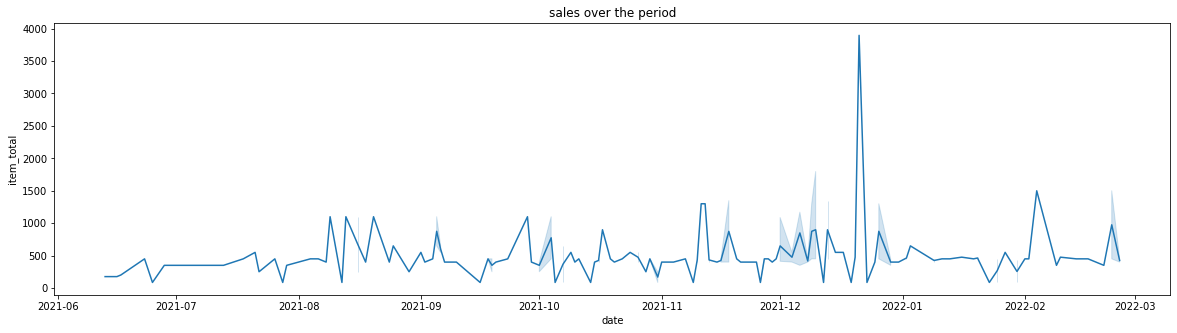

In [19]:
fig,ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x='date', y='item_total', data=df).set(title='sales over the period')

In [20]:
df_days = df[['year', 'month_name', 'day_name', 'item_total']].groupby(['year', 'month_name', 'day_name']).sum().reset_index()
# df_days.sort_values(by=['year', 'month_name'])
df.head(2)

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status,year,date,time,month_name,day_name
0,407-5532335-4314768,2021-06-13,Pavithra,POLLACHI,TAMIL NADU,KU: QV-PHXY-LGY8,Pure Leather Ganesh Piggy Bank | Money Bank fo...,1,175.0,84.96,online,Delivered to buyer,2021,2021-06-13,00:00:00,June,Sunday
1,404-7918321-6528342,2021-06-16,narendra,KODAD,TELANGANA,KU: 5B-NW9K-L3AO,Pure Leather Elephant Shaped Piggy Coin Bank |...,1,175.0,84.96,Cash On Delivery,Delivered to buyer,2021,2021-06-16,00:00:00,June,Wednesday


[Text(0.5, 1.0, 'Month wise sales')]

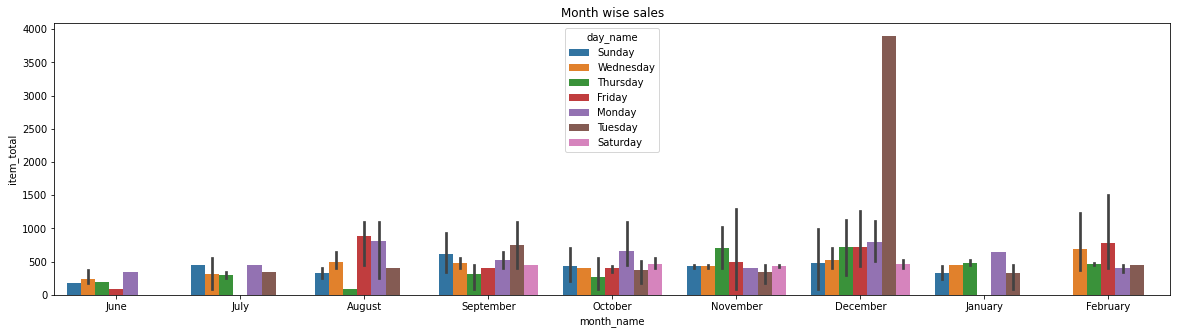

In [21]:
fig,ax = plt.subplots(figsize=(20, 5))
sns.barplot(x="month_name", y="item_total", data=df ,hue='day_name').set(title='Month wise sales')

In [22]:
df_places = df[['ship_state', 'ship_city', 'item_total']].groupby(['ship_state', 'ship_city']).sum().reset_index()
df_places.sort_values(by='item_total', ascending=False, inplace=True)

[Text(0.5, 1.0, 'Region-wise orders')]

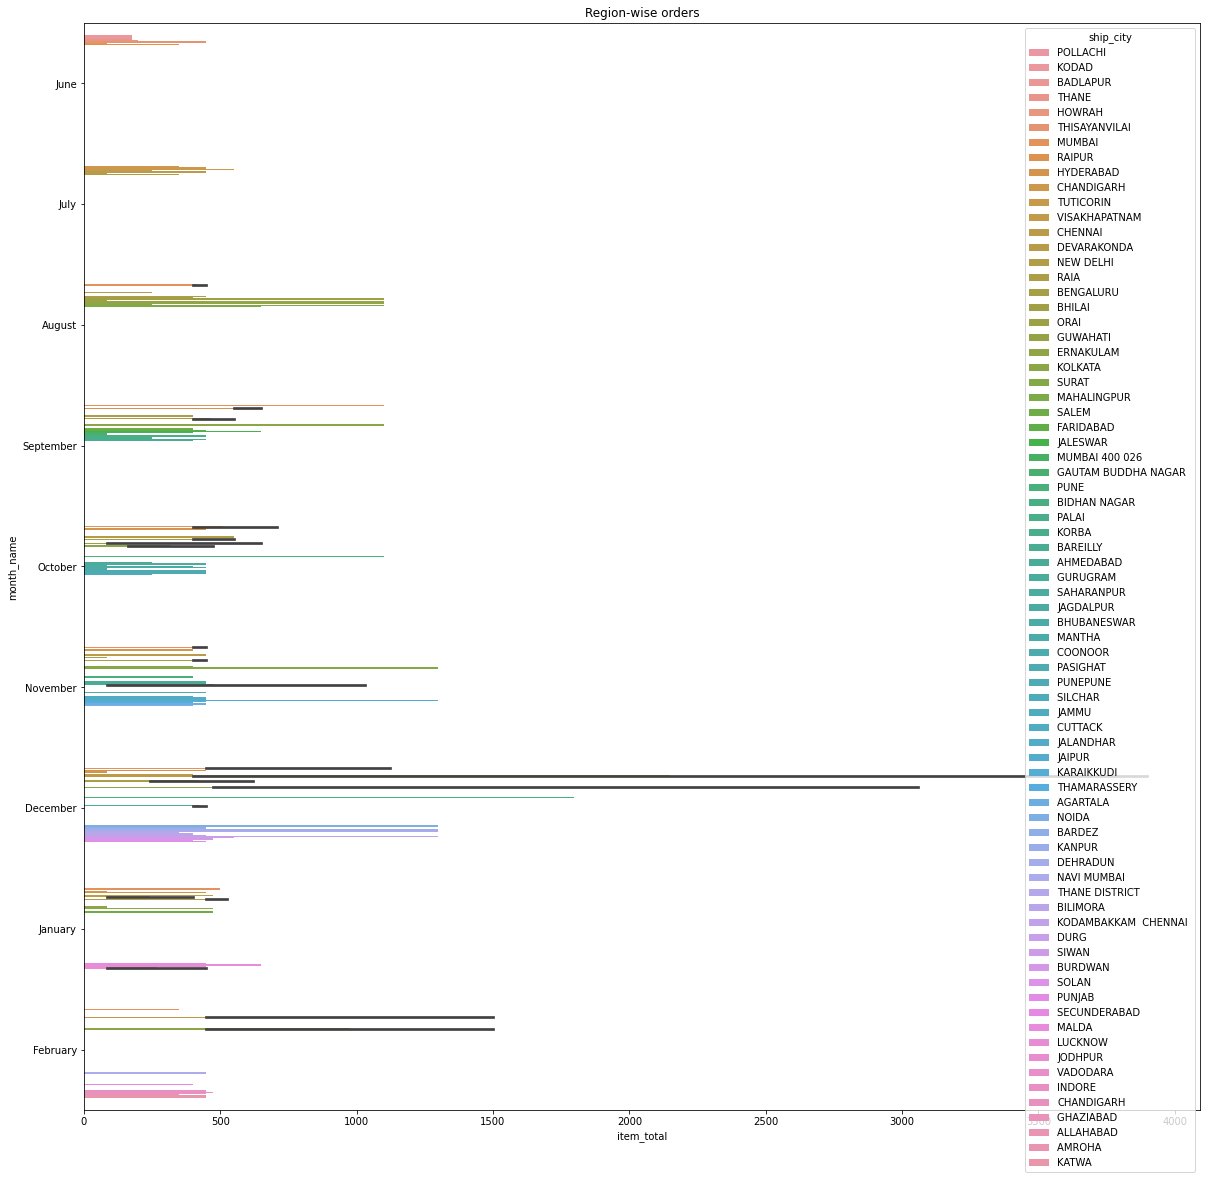

In [23]:
fig,ax = plt.subplots(figsize=(20, 20))
sns.barplot(y="month_name", x="item_total", data=df ,hue='ship_city').set(title='Region-wise orders')

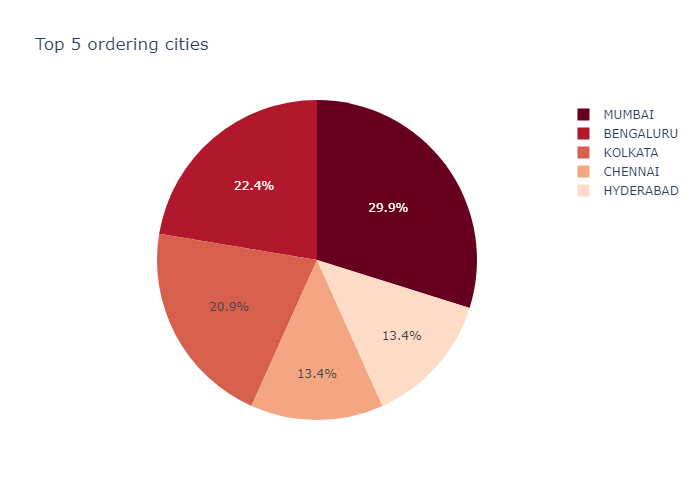

In [45]:
top_cities = df.groupby('ship_city').size().reset_index().rename(columns={0: 'Total'}).sort_values('Total', ascending=False ).head()
fig = px.pie(top_cities, values='Total', names='ship_city', color_discrete_sequence=px.colors.sequential.RdBu, title='Top 5 ordering cities')
fig.show("png")

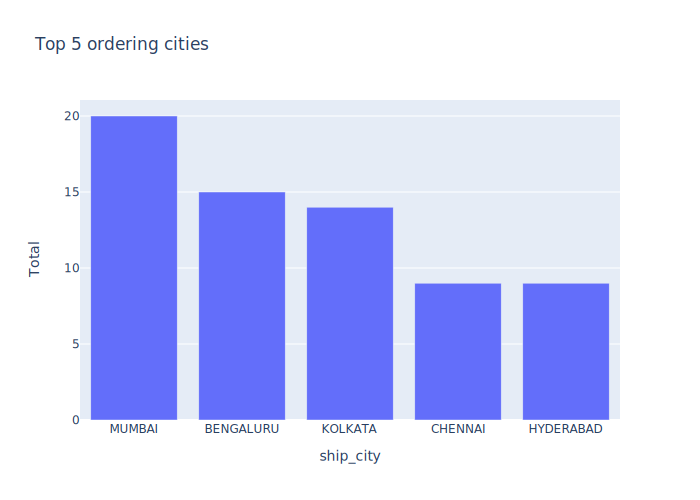

In [25]:
fig = px.bar(top_cities, y='Total', x='ship_city', title='Top 5 ordering cities')
fig.show("svg")

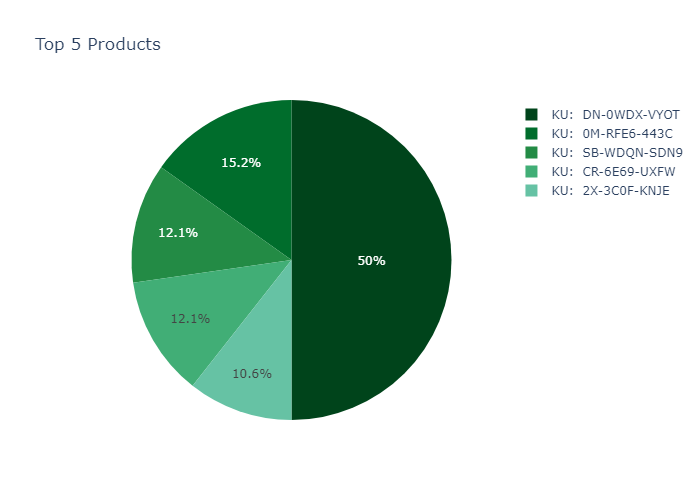

In [33]:
top_cities = df.groupby('sku').size().reset_index().rename(columns={0: 'Total'}).sort_values('Total', ascending=False).head()
fig = px.pie(top_cities, values='Total', names='sku', color_discrete_sequence=px.colors.sequential.BuGn_r, title='Top 5 Products')
fig.show("png")

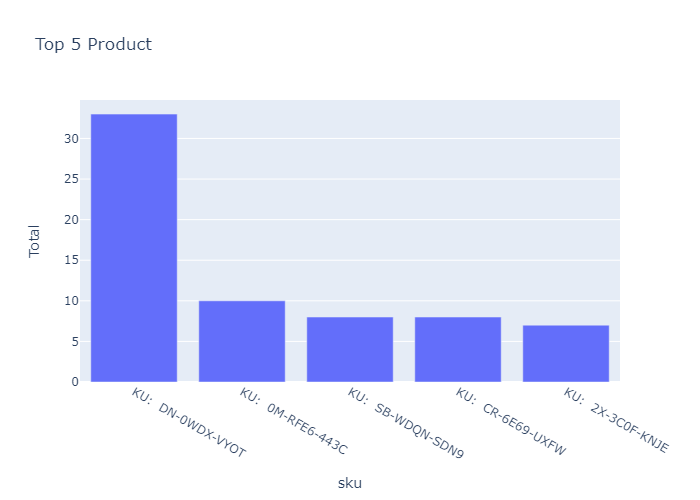

In [31]:
fig = px.bar(top_cities, x='sku', y='Total', title='Top 5 Product')
fig.show("png")

In [28]:
df['order_status'].value_counts()

Delivered to buyer    160
Returned to seller     11
Name: order_status, dtype: int64

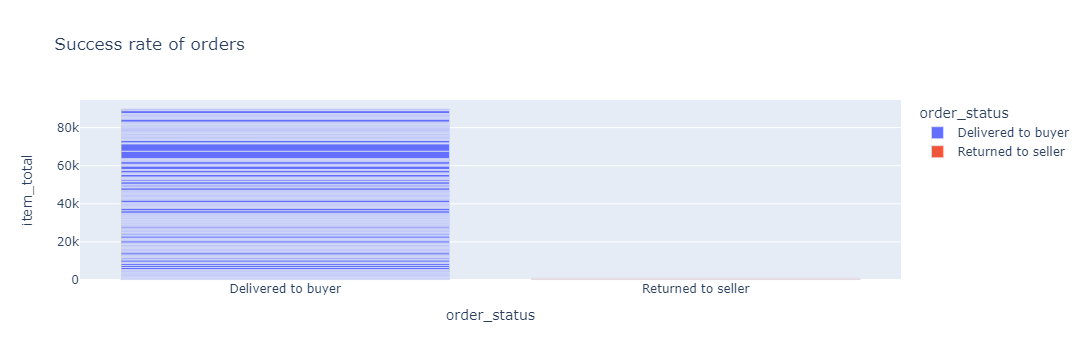

In [29]:
df_status = df[['order_status', 'item_total']]
fig = px.bar(data_frame=df_status, x='order_status', y='item_total', color='order_status', title='Success rate of orders')
fig.show()

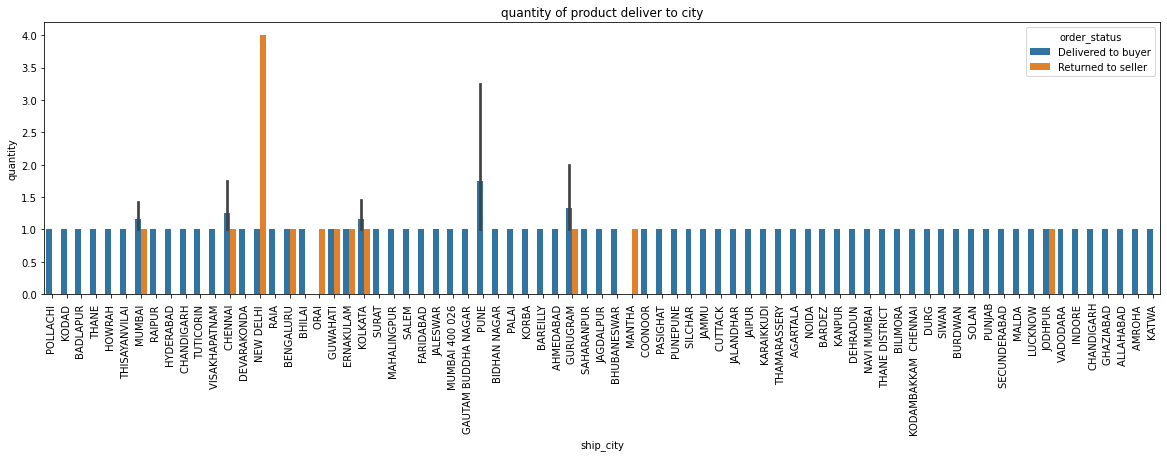

In [30]:
fig,ax = plt.subplots(figsize=(20, 5))
sns.barplot(x="ship_city", y="quantity",ax=ax, hue="order_status", data=df).set(title="quantity of product deliver to city")
plt.xticks(rotation=90)
for tick in ax.xaxis.get_major_ticks():
  tick.label.set_fontsize(10)